In [2]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [2]:
def load_data(nh_list, heuristic):
    df_all = pd.DataFrame()
    for nh in nh_list:
        df = pd.read_csv(f"{nh}/info_{heuristic}.csv")
        df['nh'] = nh
        df['execution_id'] = nh

        df = df.rename(columns={'stretch': 'app_stretch'})

        df_all = df_all.append(df)
        
    
    return df_all


In [3]:
nh_list = [ 1,  4,  8,  12, 15]

colors = ['blue', 'red', 'green']

t_begin = 1300
t_end = 6300

exclusive = load_data(nh_list=nh_list, heuristic="exclusive")
fairshare = load_data(nh_list=nh_list, heuristic="fairshare")
set10 = load_data(nh_list=nh_list, heuristic="set10")

exclusive = su.compute_metrics(exclusive, t_begin=t_begin, t_end=t_end)
fairshare = su.compute_metrics(fairshare, t_begin=t_begin, t_end=t_end)
set10 = su.compute_metrics(set10, t_begin=t_begin, t_end=t_end)

In [4]:

g = {    
    "FairShare": fairshare,
    "Exclusive-FCFS": exclusive,
    "Set-10": set10
}


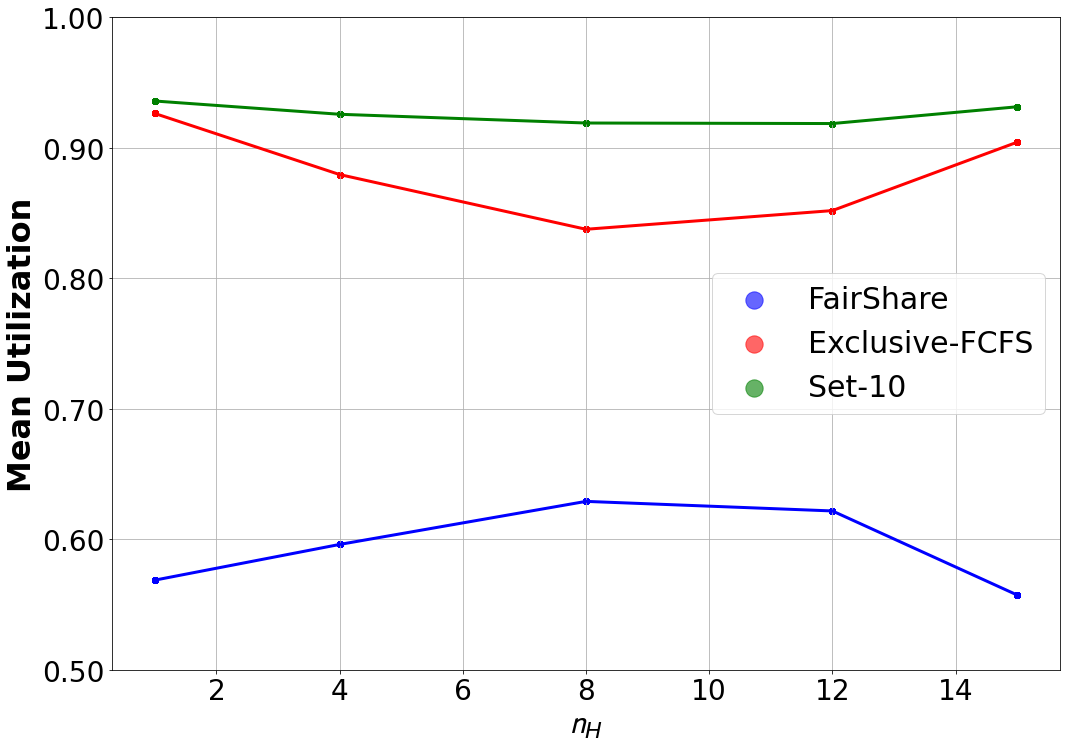

In [5]:
su.plot_scatter_utilization(g,
x_plot = nh_list,
colors=colors,
save_to="utilization_practival_simulated.pdf",
granularity=1,
ylim=(0.5, 1),
    figsize=(17, 12))

In [6]:
def plot_stretch_max(g, colors=None, title=None, show=False, save_to=None, figsize=(17, 8),  x_plot=None, ylim=None, granularity=2):
    """
    Receives a dictionary with pandas dataframes and generates the scatter graph
    x-axis  shows the number of applications in the Nh set and the y-axis presents the max stretch
    :param g: a dictionary whose keys are the scheduling heuristic names and values are dataframes
    :param title: graph titles (optional)
    :param save_to:  full path where the file (pdf) will be saved (optional)
    :param figsize: the size of the graph (optional)
    """

    fig, ax = plt.subplots(1, figsize=figsize)

    y_values = {}

    # for each element in g, plot a scatter
    color_index = 0
    for key, value in g.items():

        
        # ax.scatter(value.x.apply(lambda x: x * n_tasks), value.stretch, label=key, alpha=0.6)
        gb = value.groupby('nh')
        ax.plot(gb.groups.keys(), gb.app_stretch.max(), 'o-', color=colors[color_index], label=key, alpha=0.6)
        color_index += 1
        
       
        #gb = value.groupby("execution_id")
        # ax.scatter(value.x.apply(lambda x: x * n_tasks), value.stretch, label=key, alpha=0.6)
        # if x_plot:
        #     y_values[key] = []
        #     for v in x_plot:
        #         initial = v
        #         final = v + granularity
        #         y_values[key].append(
        #             stats.gmean(value.loc[(value.nh >= initial) & (value.nh <= final)].max_stretch)
        #         )
   
    
   
    # if x_plot:
    #     color_index = 0
    #     for key, value in g.items():
    #         if colors:
    #             ax.plot(x_plot, y_values[key], color=colors[color_index], linewidth=3)
    #             color_index += 1
    #         else:
    #             ax.plot(x_plot, y_values[key], linewidth=3)



    plt.ylabel(r'Max Stretch', fontsize=32, fontweight='bold')
    plt.xlabel(r'$\mathcal{n}_H$', fontweight='bold', fontsize=32)

    lgnd = plt.legend(prop={'size': 30})
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [300]
    
    # ax.set_yscale('log')

    plt.title(title, fontweight='bold', fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.tick_params(axis='both', which='minor', labelsize=28)

    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:0.2f}'))
    ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:0.2f}'))

    plt.grid()

    plt.ylim(ylim)

    #ax.set_xticks(x_plot)

    if save_to:
        fig.savefig(save_to, format='pdf', dpi=1200)
    if show:
        plt.show()

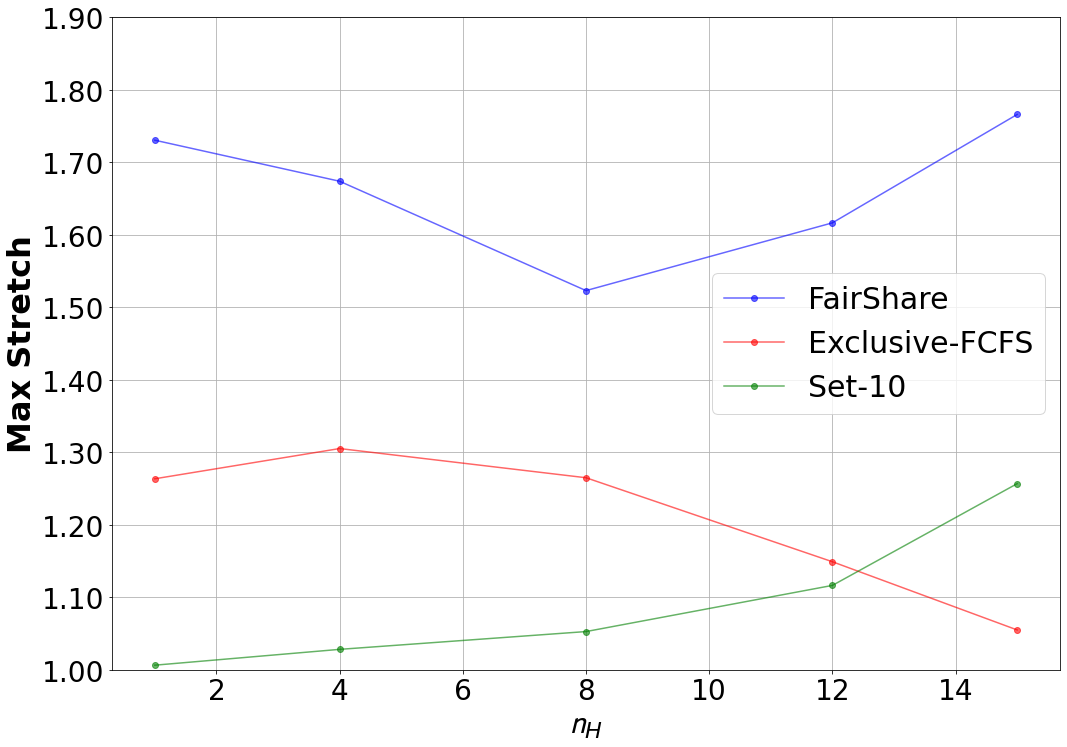

In [7]:
plot_stretch_max(g,
x_plot = nh_list,
colors=colors,
save_to="stretch_practival_simulated.pdf",
granularity=1,
ylim=(1,1.9),
    figsize=(17, 12))

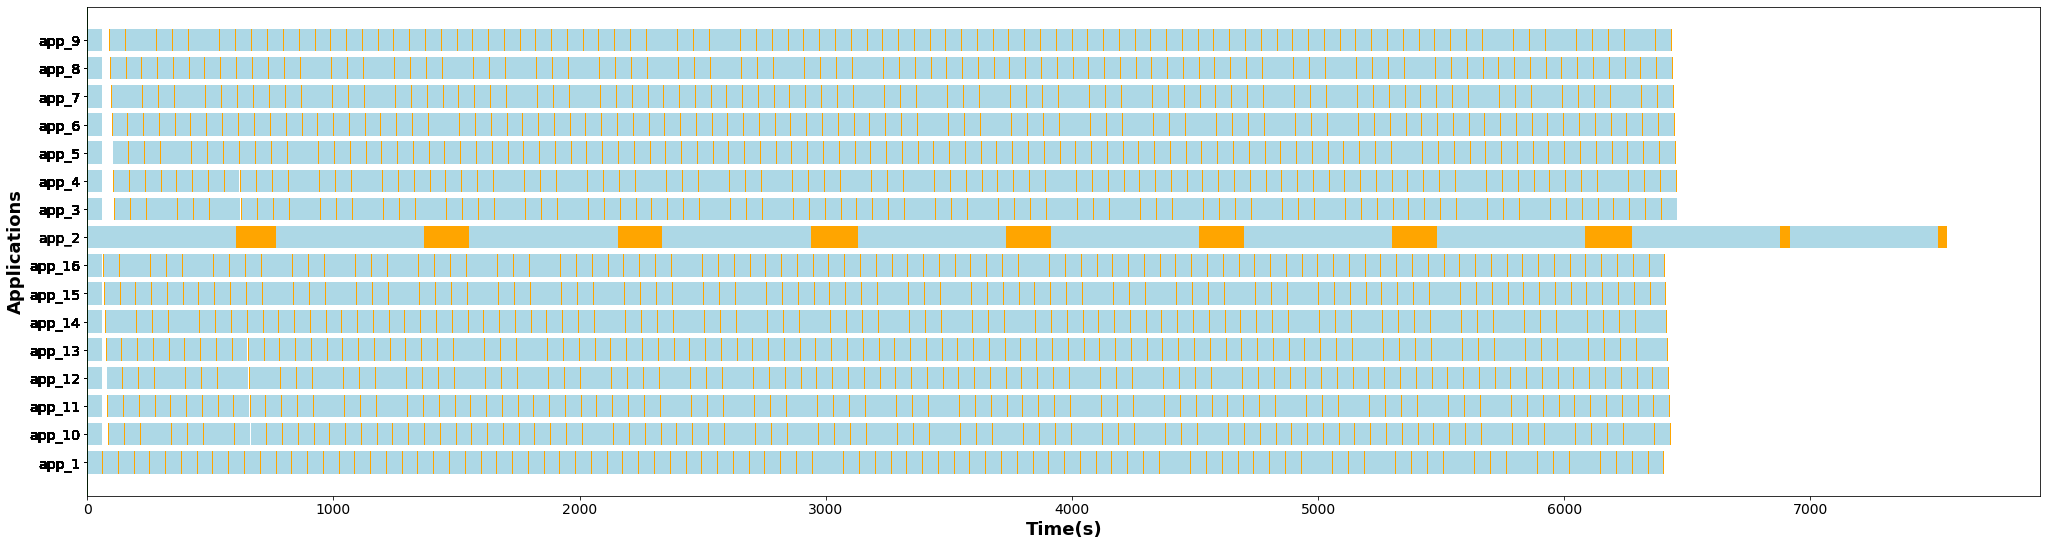

In [6]:
su.execution_graph(su.load_phases("15/phases_set10.csv"), timeframe_start=0, timeframe_end=0, figsize=(35,9), save_to="set-10_15x1.pdf")

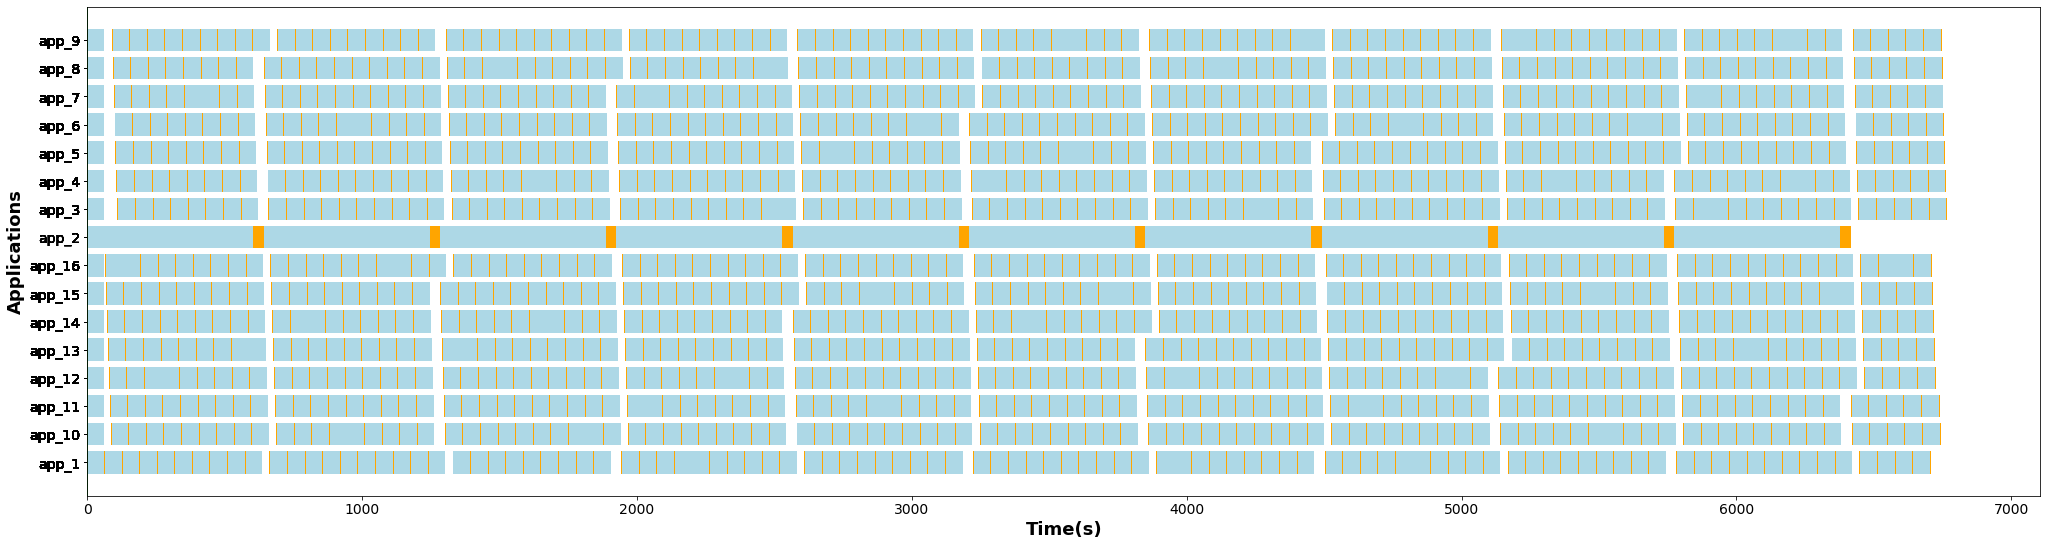

In [7]:
su.execution_graph(su.load_phases("15/phases_exclusive.csv"), timeframe_start=0, timeframe_end=0, figsize=(35,9), save_to="exclusive_15x1.pdf")